In [ ]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')


# Getting Started


In [1]:
# Importing GemPy and viewer
import gempy as gp
import gempy_viewer as gpv

# Auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Setting Backend To: AvailableBackends.numpy


## Initializing the model:

Create a gempy.Model object. This object will contain all other data structures
and necessary functionality. We'll also define a regular grid for this example.
This grid will be used for interpolating the 3D geological model. GemPy offers
different grids for various purposes. For visualization, a regular grid is most
appropriate. 



In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name='Model1',
    extent=[0, 791, -200, 200, -582, 0],
    resolution=[50, 50, 50],
    refinement=4,
    structural_frame=gp.data.StructuralFrame.initialize_default_structure()
)
geo_model

{'grid': <gempy.core.data.grid.Grid object at 0x000001B43BE9DD20>,
 'interpolation_options': InterpolationOptions(kernel_options={'range': 5, 'c_o': 10, 'uni_degree': 1, 'i_res': 4, 'gi_res': 2, 'number_dimensions': 3, 'kernel_function': <AvailableKernelFunctions.cubic: KernelFunction(base_function=<function cubic_function at 0x000001B46B44DD80>, derivative_div_r=<function cubic_function_p_div_r at 0x000001B46B44E170>, second_derivative=<function cubic_function_a at 0x000001B46B44E200>, consume_sq_distance=False)>, 'compute_condition_number': False, 'kernel_solver': <Solvers.DEFAULT: 1>}, number_octree_levels=4, current_octree_level=0, compute_scalar_gradient=False, mesh_extraction=True, mesh_extraction_masking_options=MeshExtractionMaskingOptions.INTERSECT, mesh_extraction_fancy=True, debug=True, debug_water_tight=False, sigmoid_slope=50000, _number_octree_levels_surface=4),
 'meta': GeoModelMeta(name='Model1',
                      creation_date=None,
                      last_modif

## Creating a figure:

GemPy utilizes matplotlib for 2D and pyvista-vtk for 3D visualizations. 
One design goal of GemPy is real-time model construction. This means as input data
is added, you can see the 3D surfaces update in real-time. Let's initialize 
the visualization windows. First, the 2D figure:



c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


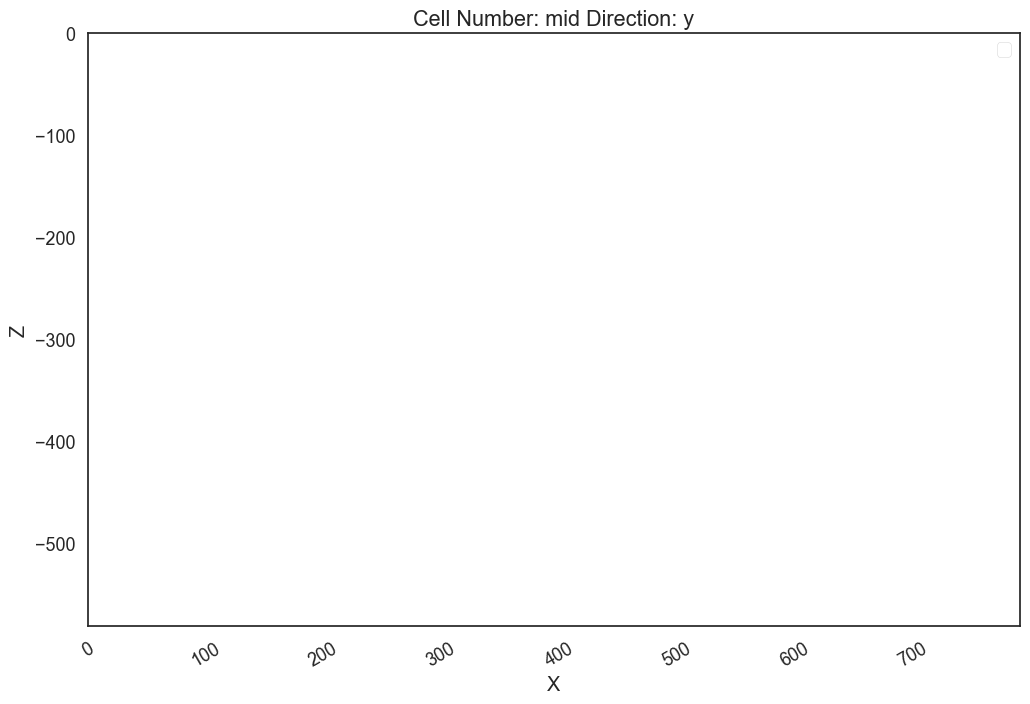

In [3]:
p2d = gpv.plot_2d(geo_model)

### Adding a model section:

In the 2D renderer, we can add several cross sections of the model. 
For simplicity, we'll add just one, perpendicular to y.



#### Loading a cross-section image:

GemPy uses standard matplotlib axes, allowing for flexibility. 
Let's load an image showing the details of a couple of boreholes:



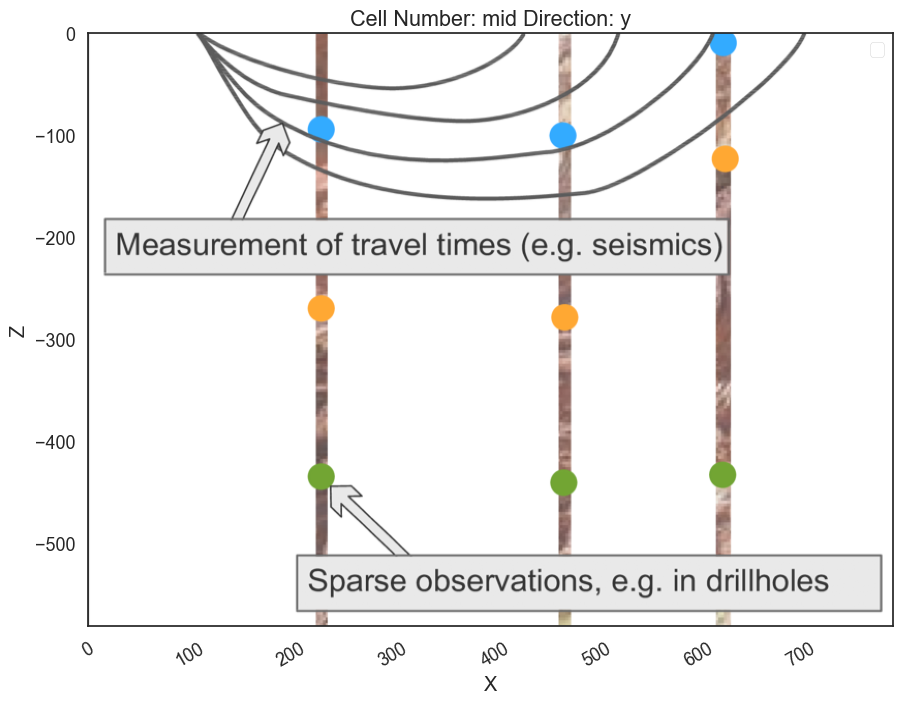

In [4]:
img = mpimg.imread('wells.png')
p2d = gpv.plot_2d(geo_model, show=False)
p2d.axes[0].imshow(img, origin='upper', alpha=.8, extent=(0, 791, -582, 0))
plt.show()

Similarly, we can visualize in 3D using pyvista and vtk:



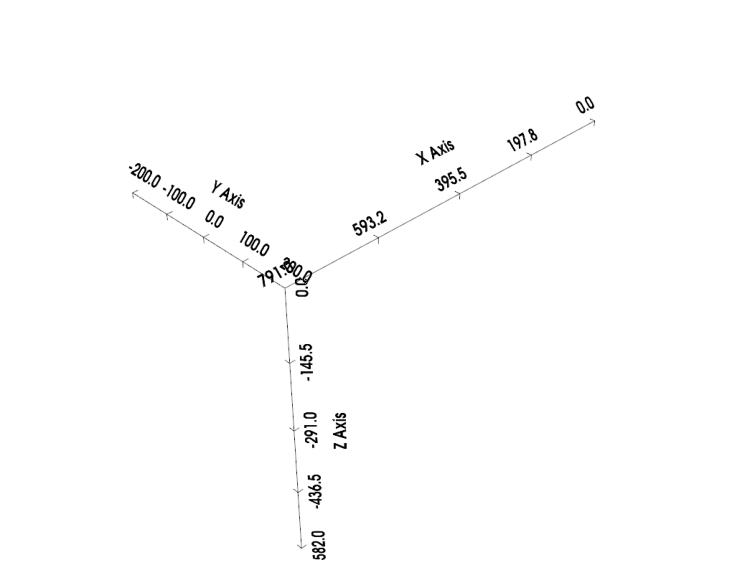

In [5]:
p3d = gpv.plot_3d(geo_model, image=True)

#### Building the model:

With everything initialized, we can begin constructing the geological model.

## Surfaces:

GemPy is a surface-based interpolator. All input data must be referred to a 
surface, which marks the bottom of a unit. By default, GemPy surfaces are empty:



In [6]:
geo_model.structural_frame.structural_elements

[Element(
 	name=surface1,
 	color=#015482,
 	is_active=True
 ),
 Element(
 	name=basement,
 	color=#9f0052,
 	is_active=True
 )]

Let's begin by adding data. GemPy input data consists of surface points and 
orientations (perpendicular to the layers). The 2D plot provides X and Z 
coordinates on mouse hover (in qt5 backend). We can add a surface point like this:



c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


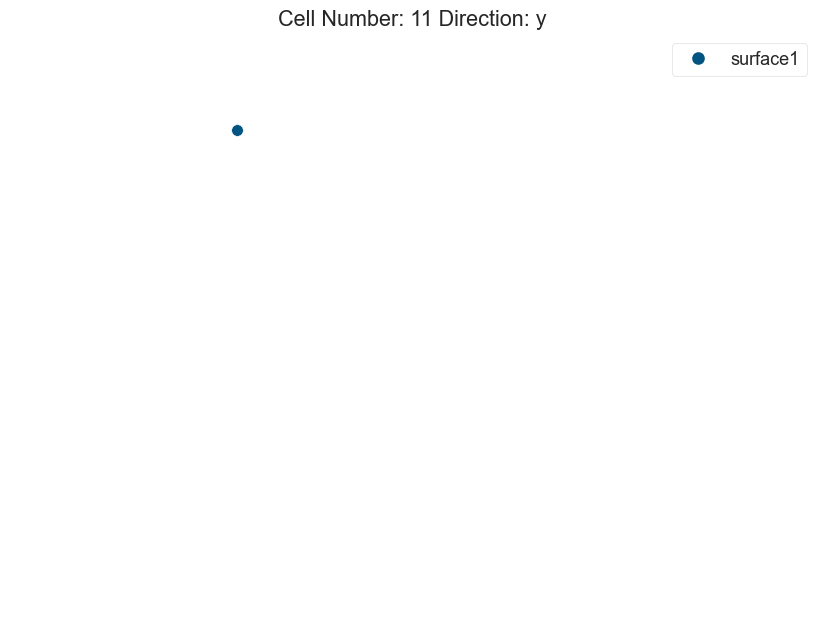

In [7]:
gp.add_surface_points(
    geo_model=geo_model,
    x=[223],
    y=[0.01],
    z=[-94],
    elements_names=['surface1']
)

gpv.plot_2d(geo_model, cell_number=11)
gpv.plot_3d(geo_model, image=True)

We can now add other points for the layer:



c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


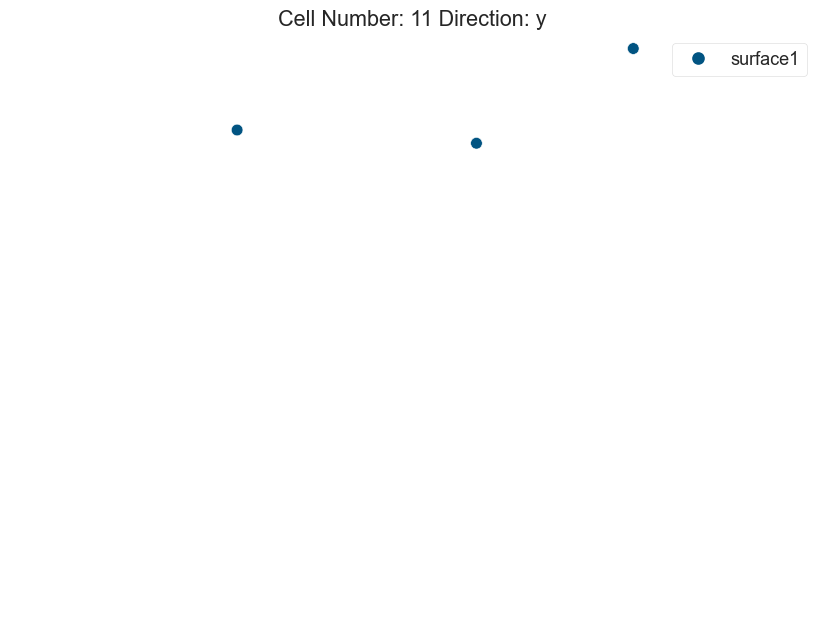

In [8]:
gp.add_surface_points(
    geo_model=geo_model,
    x=[458, 612],
    y=[0, 0],
    z=[-107, -14],
    elements_names=['surface1', 'surface1']
)

gpv.plot_2d(geo_model, cell_number=11)
gpv.plot_3d(geo_model, image=True)

To interpolate in gempy, the minimum data needed is:

  a) 2 surface points per surface 

  b) One orientation per series

Let's add an orientation:



c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


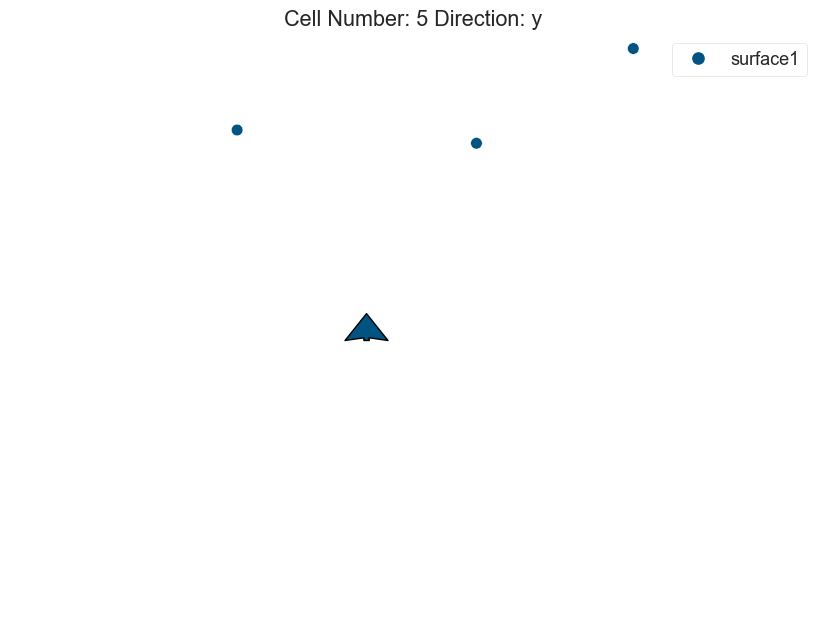

In [11]:
gp.add_orientations(
    geo_model=geo_model,
    x=[350],
    y=[1],
    z=[-300],
    elements_names=['surface1'],
    pole_vector=[[0, 0, 1]]
)

gpv.plot_2d(geo_model, cell_number=5)
gpv.plot_3d(geo_model, image=True)

## Update and Recompute Model Transform:
Removing auto anisotropy for this 2.5D model.



In [12]:
geo_model.update_transform(gp.data.GlobalAnisotropy.NONE)

## Interpolation:
With the provided data, we can now interpolate the 3D surface.



In [13]:
gp.compute_model(geo_model, engine_config=gp.data.GemPyEngineConfig())

Setting Backend To: AvailableBackends.numpy


Solutions(4 Octree Levels, 1 DualContouringMeshes)

Display interpolation kernel options:



In [14]:
geo_model.interpolation_options.kernel_options

KernelOptions(range=5, c_o=10, uni_degree=1, i_res=4, gi_res=2, number_dimensions=3, kernel_function=AvailableKernelFunctions.cubic, compute_condition_number=False, kernel_solver=Solvers.DEFAULT)

## Visualization:
Interpolated 3D surface can be visualized both in 2D and 3D.



c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


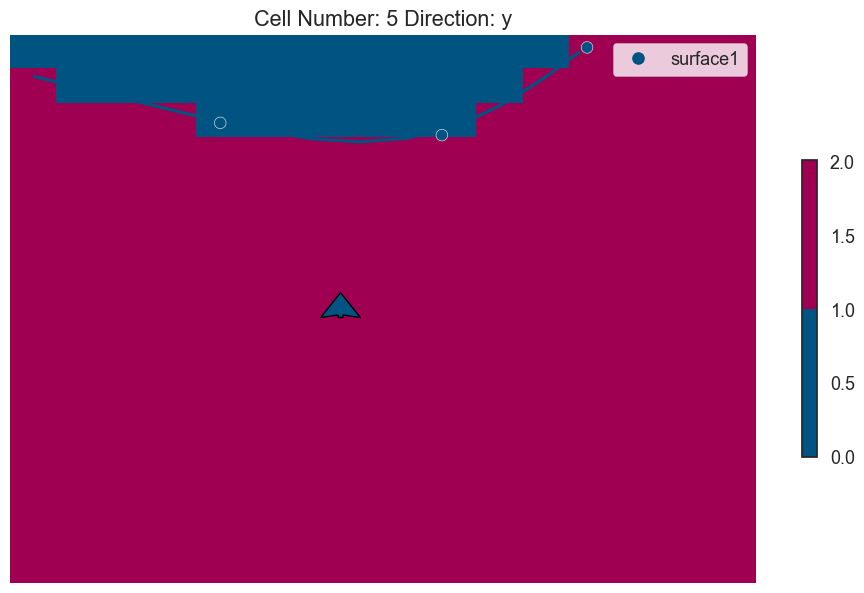

In [15]:
# 2D visualization:
gpv.plot_2d(geo_model, cell_number=[5])

# 3D visualization:
gpv.plot_3d(geo_model, show_surfaces=True, image=True)

## Expanding the Model with More Layers:
Our cross-section image displays 4 layers, yet we only defined 2. Let's add two more.



In [16]:
# Display current structural frame:
geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=default_formations,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=surface1,
	color=#015482,
	is_active=True
)
]
)
],
	fault_relations=
[[False]],

## Defining Layer 2:
Adding points and properties for the next layer.



Setting Backend To: AvailableBackends.numpy


c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


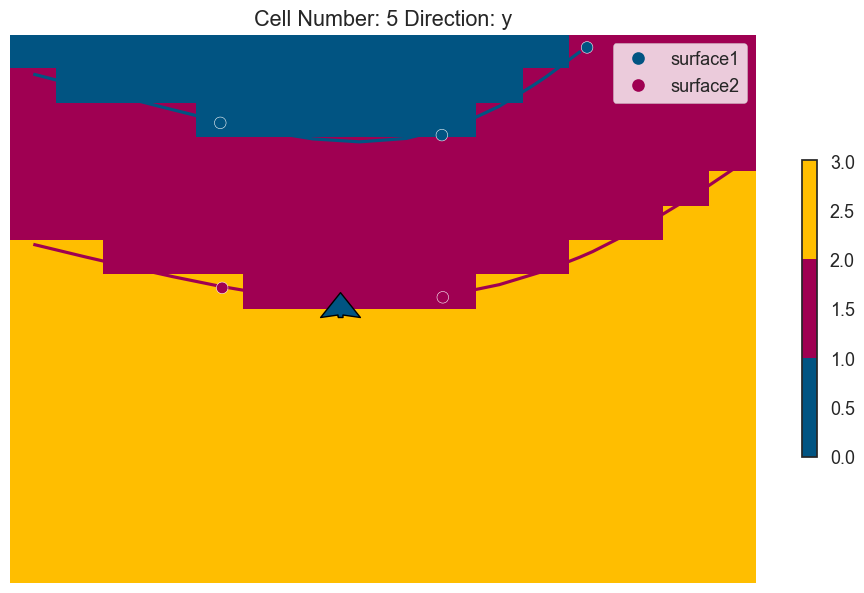

In [17]:
element2 = gp.data.StructuralElement(
    name='surface2',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([225, 459]),
        y=np.array([0, 0]),
        z=np.array([-269, -279]),
        names='surface2'
    ),
    orientations=gp.data.OrientationsTable.initialize_empty()
)

geo_model.structural_frame.structural_groups[0].append_element(element2)

# Compute and visualize the updated model:
gp.compute_model(geo_model)
gpv.plot_2d(geo_model, cell_number=5, legend='force')
gpv.plot_3d(geo_model, image=True)

## Defining Layer 3:
Adding points and properties for another layer.



Setting Backend To: AvailableBackends.numpy


c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


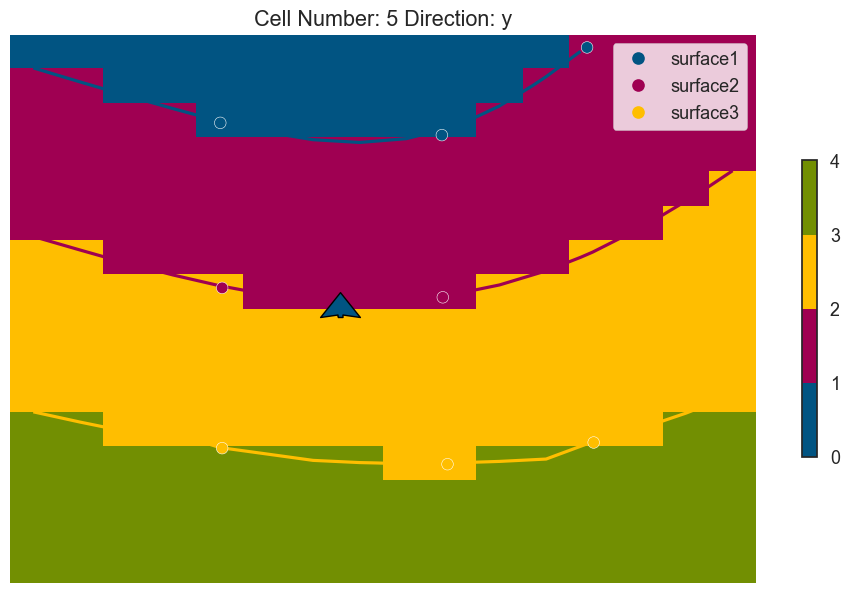

In [18]:
element3 = gp.data.StructuralElement(
    name='surface3',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([225, 464, 619]),
        y=np.array([0, 0, 0]),
        z=np.array([-439, -456, -433]),
        names='surface3'
    ),
    orientations=gp.data.OrientationsTable.initialize_empty()
)

geo_model.structural_frame.structural_groups[0].append_element(element3)

# Compute and visualize with adjusted parameters:
gp.compute_model(geo_model)
gpv.plot_2d(geo_model, cell_number=5, legend='force')
gpv.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2}, image=True)

## Adding a Fault:
To date, our model represents a simple depositional unit. With GemPy, we can
incorporate unconformities and faults for more intricate models. 
Relationships are depicted as:
input data (surface points/ orientations) <belong to< surface <belong to< series.
Here, we'll add a fault as a demonstration. 



Add the fault's input data:



c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


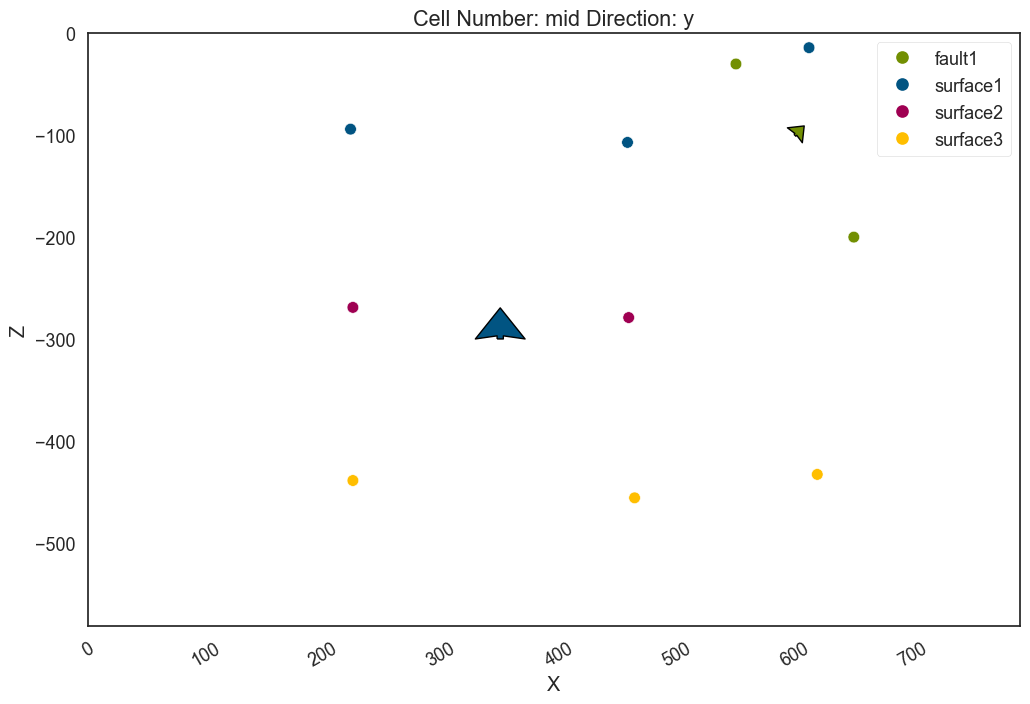

In [19]:
element_fault = gp.data.StructuralElement(
    name='fault1',
    color=next(geo_model.structural_frame.color_generator),
    surface_points=gp.data.SurfacePointsTable.from_arrays(
        x=np.array([550, 650]),
        y=np.array([0, 0]),
        z=np.array([-30, -200]),
        names='fault1'
    ),
    orientations=gp.data.OrientationsTable.from_arrays(
        x=np.array([600]),
        y=np.array([0]),
        z=np.array([-100]),
        G_x=np.array([.3]),
        G_y=np.array([0]),
        G_z=np.array([.3]),
        names='fault1'
    )
)

group_fault = gp.data.StructuralGroup(
    name='Fault1',
    elements=[element_fault],
    structural_relation=gp.data.StackRelationType.FAULT,
    fault_relations=gp.data.FaultsRelationSpecialCase.OFFSET_ALL
)

# Insert the fault group into the structural frame:
geo_model.structural_frame.insert_group(0, group_fault)

# Preview the model's input data:
gpv.plot_2d(geo_model, show_results=False)

Compute and visualize the updated model:



Setting Backend To: AvailableBackends.numpy


c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


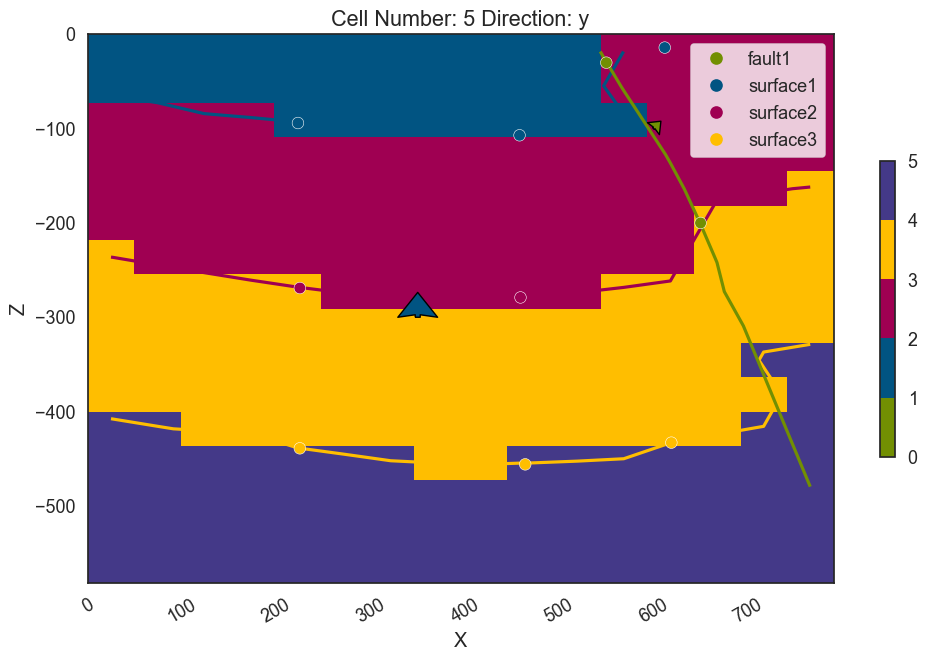

In [21]:
gp.compute_model(geo_model)
gpv.plot_2d(geo_model, cell_number=5, legend='force')
gpv.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

## Advanced Features:
Over time, numerous capabilities have been integrated with GemPy. 
Here, we'll showcase a few of them.



Active grids: ['topography']


c:\Users\BernardoPR4\anaconda3\envs\gempy_3\lib\site-packages\gempy_viewer\API\_plot_2d_API.py:172: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


Setting Backend To: AvailableBackends.numpy


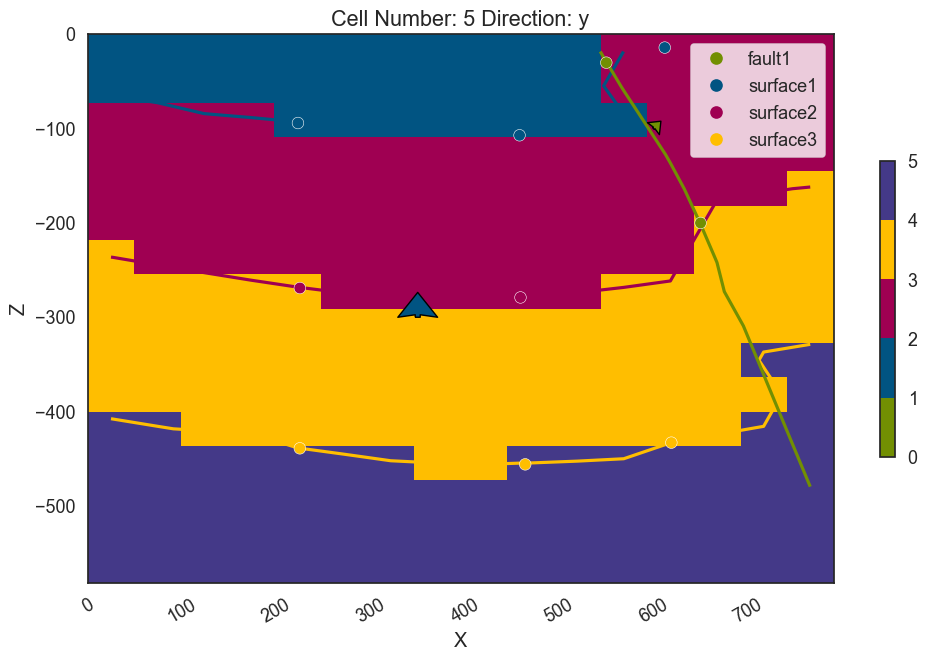

In [22]:
# Topography:
# GemPy offers built-in tools to manage topographic data through gdal.
# For demonstration, we'll create a random topography:

gp.set_topography_from_random(
    grid=geo_model.grid,
    fractal_dimension=1.9,
    d_z=np.array([-150, 0]),
    topography_resolution=np.array([200, 200])
)

# Visualize the topography:
gpv.plot_2d(geo_model, cell_number=5, legend='force')
gpv.plot_3d(geo_model, kwargs_plot_structured_grid={'opacity': .2})

# Calculate and visualize the area's geological map:
gp.compute_model(geo_model)
gpv.plot_3d(geo_model, show_topography=True)

#### Gravity Inversion:

.. admonition:: Coming soon: Gravity inversion

    This feature is not yet available in the current version of GemPy.



Assign density values to model units:
geo_model.add_surface_values([0, 2.6, 2.4, 3.2, 3.6], ['density'])

Generate a centered grid around a device for improved accuracy:
geo_model.set_centered_grid(centers=[[400, 0, 0]], resolution=[10, 10, 100], radius=800)

Adjust the compile code for gravity computation:
gp.set_interpolator(geo_model, output=['gravity'], aesara_optimizer='fast_run')

Besides the interpolation, compute the model's forward gravity:
gp.compute_model(geo_model)
geo_model.solutions.fw_gravity

sphinx_gallery_thumbnail_number = -2

